In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
FitFunctionsPath = env('FitFunctionsPath') #* get the path of the script
root_Data_Input  = env('DataSet_Img_Vs_Img_InPut')         #* get the path of the dataSet
root_Data_Output = env('DataSet_Img_Vs_Img_OutPut')         #* get the path of the dataSet
root_Data_Input_Val  = env('DataSet_Img_Vs_Img_InPut_Val')         #* get the path of the dataSet
root_Data_Output_Val = env('DataSet_Img_Vs_Img_OutPut_Val')         #* get the path of the dataSet
root_Data = [root_Data_Input, root_Data_Output]
model_save_dir   = env('model_save_dir')   #* get the path where we will save the model


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitFunctionsPath)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

device =  cuda


In [2]:
image_Height   = 572
image_Width    = 572
image_Channels = 1
batch_size     = 64

Size data set lower definition 1229
image_array.shape =  (572, 572, 1)


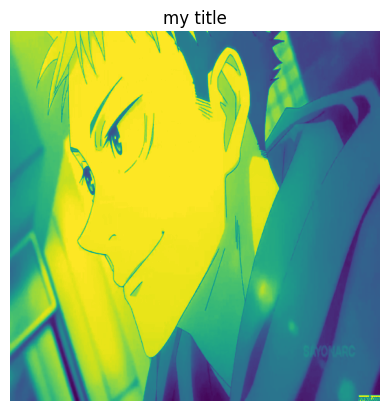

image_array.shape =  (1144, 1144, 1)


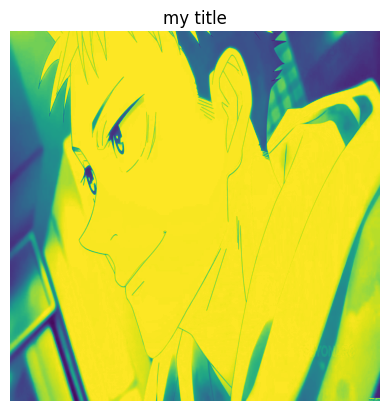

In [3]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


inputResize = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.Resize((image_Height, image_Width)),  # Resize the image
    transforms.Grayscale(num_output_channels=1),  # Convert to black and white
    transforms.ToTensor(),  # Convert to tensor
])


outPutResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height*2, image_Width*2)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])


myDataSet     = DataSet_Img_To_Img(root_Data, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 100)

from toolsTest import plot_img_tensor

plot_img_tensor(myDataSet.__getitem__(3)[0], [0])
plot_img_tensor(myDataSet.__getitem__(3)[1], [0])


image_array.shape =  (388, 388, 1)


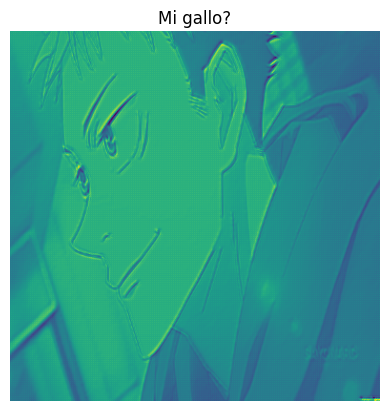

In [5]:
import importlib
import Models.model_U_Net

importlib.reload(Models.model_U_Net)
from Models.model_U_Net import model_U_Net
from toolsTest import plot_img_tensor


myModel = model_U_Net()
myModel.to(device = device)

chanels_to_plot = [0]
indexImg_to_plot = 6

plot_img_tensor(myModel((myDataSet.__getitem__(indexImg_to_plot)[0]).to(device),), chanels_to_plot, "Mi gallo?")
# print(myModel((myDataSet.__getitem__(indexImg_to_plot)[0]).to(device)).shape)